In [1]:
# Description: This program uses the Money Flow Index to determine when to buy and sell stocks
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\joon7\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Store the data into a df
# 005930.KS is the ticker for Samsung Electronics.
df = web.DataReader('005930.KS', data_source='yahoo', start='2018-12-16', end='2022-03-02')
# Take a look at the data
#df = df.set_index(pd.DatetimeIndex(df.index.values))
# Show the data
# df.info()
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-17,39600.0,38650.0,38650.0,39150.0,11532968.0,35366.843750
2018-12-18,39200.0,38300.0,38300.0,38900.0,11042101.0,35141.000000
2018-12-19,39350.0,38850.0,38900.0,39100.0,9942037.0,35321.671875
2018-12-20,39100.0,38500.0,38600.0,38650.0,11937617.0,34915.156250
2018-12-21,38650.0,38100.0,38200.0,38650.0,14947080.0,34915.156250
...,...,...,...,...,...,...
2022-02-23,74300.0,74300.0,74300.0,74300.0,0.0,74300.000000
2022-02-24,72300.0,71300.0,72300.0,71500.0,15759283.0,71500.000000
2022-02-25,72600.0,71900.0,72100.0,71900.0,13168484.0,71900.000000


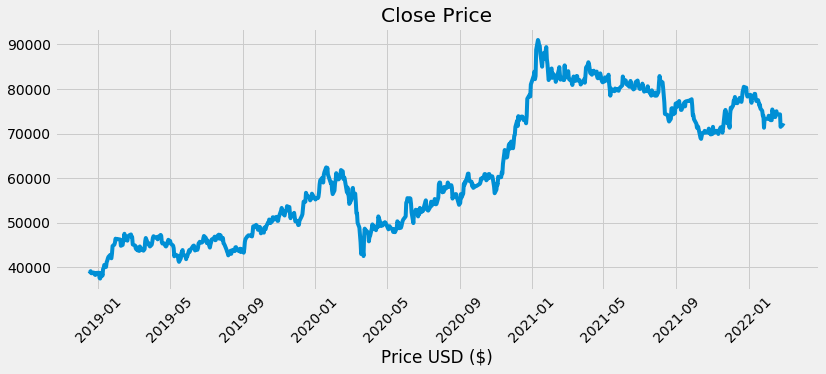

In [3]:
# Visually show the stock price
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close')
plt.title('Close Price')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.xlabel('Price USD ($)')
plt.show()

In [4]:
# Calculate the typical price
typical_price = (df['Close'] + df['High'] + df['Low']) / 3
typical_price

Date
2018-12-17    39133.333333
2018-12-18    38800.000000
2018-12-19    39100.000000
2018-12-20    38750.000000
2018-12-21    38466.666667
                  ...     
2022-02-23    74300.000000
2022-02-24    71700.000000
2022-02-25    72133.333333
2022-02-28    71900.000000
2022-03-02    71866.666667
Length: 789, dtype: float64

In [5]:
# Get the period
# typically MFI uses 14 days
period = 14

In [6]:
# Calculate the money flow
money_flow = typical_price * df['Volume']
money_flow

Date
2018-12-17    4.513235e+11
2018-12-18    4.284335e+11
2018-12-19    3.887336e+11
2018-12-20    4.625827e+11
2018-12-21    5.749643e+11
                  ...     
2022-02-23    0.000000e+00
2022-02-24    1.129941e+12
2022-02-25    9.498866e+11
2022-02-28    0.000000e+00
2022-03-02    8.969988e+11
Length: 789, dtype: float64

In [7]:
# Get all of the positive and negative money flows
positive_flow = []
negative_flow = []

# Loop through the typical price
for i in range(1, len(typical_price)):
    if typical_price[i] > typical_price[i-1]:
        positive_flow.append(money_flow[i-1])
        negative_flow.append(0)
    elif typical_price[i] < typical_price[i-1]:
        negative_flow.append(money_flow[i-1])
        positive_flow.append(0)
    else:
        positive_flow.append(0)
        negative_flow.append(0)

In [8]:
# Get all of the positive and negative money flows with the time period
positive_mf = []
negative_mf = []

for i in range(period-1, len(positive_flow)):
    positive_mf.append(sum(positive_flow[i + 1 - period : i+1]))
for i in range(period-1, len(negative_flow)):
    negative_mf.append(sum(negative_flow[i + 1 - period : i+1]))
    

In [9]:
# Calculate the money flow index
mfi = 100 * (np.array(positive_mf) / ((np.array(positive_mf)) + np.array(negative_mf)))
mfi

array([44.94523384, 53.89172346, 54.99446425, 54.32611916, 61.32653378,
       60.69966616, 66.24813353, 73.66425712, 73.91003008, 67.16609749,
       66.03306348, 72.86317387, 73.27326916, 81.67611904, 82.42792142,
       82.53514841, 83.00163231, 89.51352704, 82.37659172, 74.74691596,
       69.18471634, 69.20747573, 69.65315655, 74.88522105, 71.91324641,
       71.98137625, 67.30460993, 64.72536372, 57.37886165, 55.71411004,
       53.00499649, 43.82585447, 50.94327646, 53.74469535, 49.92051074,
       42.34618909, 34.55125774, 33.85116921, 35.50240838, 28.77516437,
       35.54199328, 29.91995605, 30.74764482, 34.57530006, 28.2424489 ,
       33.07575661, 29.50319386, 35.37734591, 49.75404932, 49.75943274,
       50.32395456, 43.8483739 , 44.22140965, 44.45399085, 44.79354838,
       50.9949737 , 56.8684048 , 55.44130492, 66.05534811, 60.00290314,
       56.49362153, 50.97538922, 38.99041743, 48.72200718, 54.69004568,
       54.93945128, 61.41716976, 61.8681783 , 52.86049082, 47.11

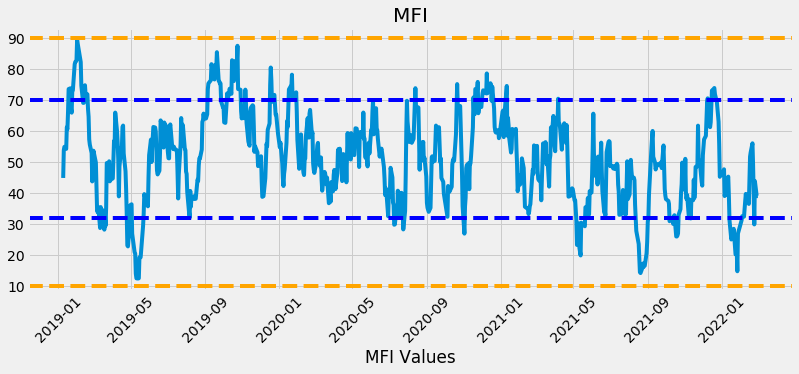

,High,Low,Open,Close,Volume,Adj Close,MFI
Date,,,,,,,
2019-01-09,39600.0,38300.0,38650.0,39600.0,17452708.0,36106.652344,44.945234
2019-01-10,40150.0,39600.0,40000.0,39800.0,14731699.0,36289.003906,53.891723
2019-01-11,40550.0,39950.0,40350.0,40500.0,11661063.0,36927.253906,54.994464
2019-01-14,40700.0,39850.0,40450.0,40050.0,11984996.0,36516.949219,54.326119
2019-01-15,41100.0,39850.0,40050.0,41100.0,11492756.0,37474.324219,61.326534
...,...,...,...,...,...,...,...
2022-02-23,74300.0,74300.0,74300.0,74300.0,0.0,74300.000000,40.369845
2022-02-24,72300.0,71300.0,72300.0,71500.0,15759283.0,71500.000000,29.937585
2022-02-25,72600.0,71900.0,72100.0,71900.0,13168484.0,71900.000000,43.923898


In [10]:
# Visually show the MFI
df2 = pd.DataFrame()
df2 = df[period:]
df2['MFI'] = mfi
high = 70
low = 32
#Create the plot
plt.figure(figsize=(12.2, 4.5))
plt.plot(df2['MFI'], label='MFI')
plt.axhline(10, linestyle = '--', color = 'orange')
plt.axhline(low, linestyle = '--', color = 'blue')
plt.axhline(high, linestyle = '--', color = 'blue')
plt.axhline(90, linestyle = '--', color = 'orange')
plt.title('MFI')
plt.xticks(rotation=45)
plt.xlabel('MFI')
plt.xlabel('MFI Values')
plt.show()
df2

In [11]:
new_df = pd.DataFrame()
new_df = df[period:]
new_df['MFI'] = mfi

In [12]:
# Show the new data frame
new_df

,High,Low,Open,Close,Volume,Adj Close,MFI
Date,,,,,,,
2019-01-09,39600.0,38300.0,38650.0,39600.0,17452708.0,36106.652344,44.945234
2019-01-10,40150.0,39600.0,40000.0,39800.0,14731699.0,36289.003906,53.891723
2019-01-11,40550.0,39950.0,40350.0,40500.0,11661063.0,36927.253906,54.994464
2019-01-14,40700.0,39850.0,40450.0,40050.0,11984996.0,36516.949219,54.326119
2019-01-15,41100.0,39850.0,40050.0,41100.0,11492756.0,37474.324219,61.326534
...,...,...,...,...,...,...,...
2022-02-23,74300.0,74300.0,74300.0,74300.0,0.0,74300.000000,40.369845
2022-02-24,72300.0,71300.0,72300.0,71500.0,15759283.0,71500.000000,29.937585
2022-02-25,72600.0,71900.0,72100.0,71900.0,13168484.0,71900.000000,43.923898


In [13]:
# Create a function to get the buy and sell signals
def get_signal(data, high, low):
    buy_signal = []
    sell_signal = []
    
    for i in range(len(data['MFI'])):
        if data['MFI'][i] > high:
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
        elif data['MFI'][i] < low:
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)   
        else:
            buy_signal.append(np.nan)   
            sell_signal.append(np.nan)   
    return (buy_signal, sell_signal)

In [14]:
# Add new columns (Buy & Sell)
new_df['Buy'] = get_signal(new_df, high, low)[0]
new_df['Sell'] = get_signal(new_df, high, low)[1]
# Show the data

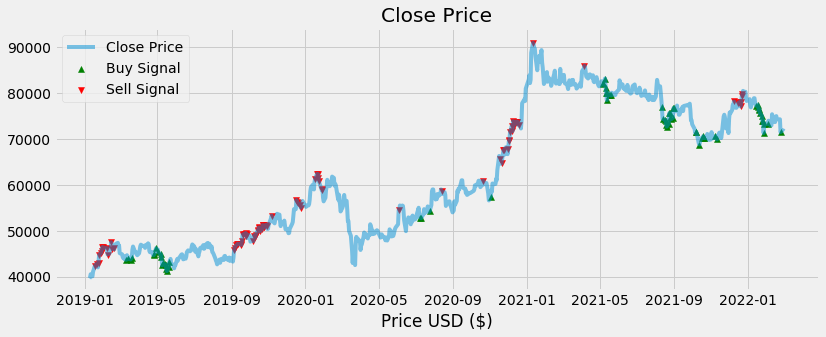

Date
2019-01-09        NaN
2019-01-10        NaN
2019-01-11        NaN
2019-01-14        NaN
2019-01-15        NaN
               ...   
2022-02-23        NaN
2022-02-24    71500.0
2022-02-25        NaN
2022-02-28        NaN
2022-03-02        NaN
Name: Buy, Length: 775, dtype: float64
-------------------------------------------------------------------------------
Date
2019-01-09   NaN
2019-01-10   NaN
2019-01-11   NaN
2019-01-14   NaN
2019-01-15   NaN
              ..
2022-02-23   NaN
2022-02-24   NaN
2022-02-25   NaN
2022-02-28   NaN
2022-03-02   NaN
Name: Sell, Length: 775, dtype: float64
-------------------------------------------------------------------------------
Buy it
nan


Sell it
nan


In [15]:
# plot the data
plt.figure(figsize=(12.2, 4.5))
plt.plot(new_df['Close'], label='Close Price', alpha = 0.5)
plt.scatter(new_df.index, new_df['Buy'], color = 'green', label='Buy Signal', marker = '^', alpha=1)
plt.scatter(new_df.index, new_df['Sell'], color = 'red', label='Sell Signal', marker = 'v', alpha=1)
plt.title('Close Price')
plt.xlabel('Date')
plt.xlabel('Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()
print(new_df['Buy'])
print("-------------------------------------------------------------------------------")
print(new_df['Sell'])
print("-------------------------------------------------------------------------------")
print("Buy it")
print(new_df['Buy'][-1])
print("\n")
print("Sell it")
print(new_df['Sell'][-1])